# Expand window

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load train and test data

In [9]:
train_data = pd.read_csv("../../data/filled_train.csv")

print(train_data.shape)

train_data.sample(5)

(164309, 13)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
131763,10131764,25000,< 1 year,Mortgage,62000.0,VERIFIED - income,debt_consolidation,15.81,0,14,34,Female,3
45993,10045994,6000,10+ years,Rent,63000.0,not verified,credit_card,21.03,0,13,21,Male,2
66730,10066731,4800,4 years,Rent,22000.0,VERIFIED - income,debt_consolidation,5.35,1,4,9,Male,3
152415,10152416,3600,10+ years,Rent,49000.0,VERIFIED - income,debt_consolidation,18.02,1,7,11,Female,3
20638,10020639,6000,< 1 year,Rent,45000.0,VERIFIED - income source,debt_consolidation,4.83,1,5,6,Female,3


# Analysis

In [11]:
for i in range(1,4):
    print("Interest Rate Category:", i)
    print("-------------------------")
    print("Loan Min:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].min())
    print("Loan Max:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].max())
    print("Loan Mean:", train_data.loc[train_data['Interest_Rate']==i, 'Loan_Amount_Requested'].mean())
    
    print(" ")

Interest Rate Category: 1
-------------------------
Loan Min: 500
Loan Max: 35000
Loan Mean: 13351.44353073419
 
Interest Rate Category: 2
-------------------------
Loan Min: 500
Loan Max: 35000
Loan Mean: 13419.251912723152
 
Interest Rate Category: 3
-------------------------
Loan Min: 1000
Loan Max: 35000
Loan Mean: 16007.801678821153
 


In [12]:
purposes = list(train_data['Purpose_Of_Loan'].unique())
purposes

['car',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'major_purchase',
 'other',
 'medical',
 'small_business',
 'moving',
 'wedding',
 'vacation',
 'house',
 'educational',
 'renewable_energy']

In [13]:
sorted_loan = train_data['Purpose_Of_Loan'].value_counts(dropna = False, normalize = True).to_frame('Share').apply(lambda x: x*100)
sorted_loan

,Share
debt_consolidation,59.096580
credit_card,22.326227
home_improvement,5.641200
other,5.079454
major_purchase,2.090573
small_business,1.455794
car,1.147229
medical,0.937867
moving,0.592786
vacation,0.509406


In [14]:
for purpose in sorted_loan.index[0:4]:
    print(purpose)
    print("================")
    print(train_data.loc[train_data['Purpose_Of_Loan'] == purpose, 'Home_Owner'].value_counts(ascending=False))
    print("")

debt_consolidation
Rent        48674
Mortgage    41526
Own          6878
Other          20
None            3
Name: Home_Owner, dtype: int64

credit_card
Rent        18519
Mortgage    15401
Own          2745
Other          14
None            5
Name: Home_Owner, dtype: int64

home_improvement
Mortgage    6153
Rent        2075
Own         1039
Other          2
Name: Home_Owner, dtype: int64

other
Rent        4769
Mortgage    2809
Own          761
Other          5
None           2
Name: Home_Owner, dtype: int64



#### From above data we can see that main purpose of loan is through 'debt consolidation' and that too for people who are staying in 'Rent' houses

In [15]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [16]:
rent_debt_consolidation = train_data.loc[(train_data['Purpose_Of_Loan'] == 'debt_consolidation') & (train_data['Home_Owner'] == 'Rent')]
rent_debt_consolidation.sample(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
100758,10100759,9000,10+ years,Rent,65000.0,not verified,debt_consolidation,15.81,0,7,24,Male,2
110124,10110125,14000,2 years,Rent,73000.0,VERIFIED - income,debt_consolidation,21.24,0,9,29,Male,1
106578,10106579,23550,9 years,Rent,62300.0,VERIFIED - income,debt_consolidation,11.91,0,8,27,Female,3
94688,10094689,10025,2 years,Rent,90000.0,not verified,debt_consolidation,13.72,1,22,38,Female,2
140583,10140584,10000,8 years,Rent,98000.0,VERIFIED - income,debt_consolidation,13.41,0,5,8,Male,2
140972,10140973,12000,5 years,Rent,63000.0,VERIFIED - income source,debt_consolidation,21.73,1,9,16,Male,3
27940,10027941,28000,10+ years,Rent,86000.0,VERIFIED - income source,debt_consolidation,8.83,1,11,26,Female,3
7934,10007935,9000,3 years,Rent,60000.0,not verified,debt_consolidation,25.72,3,29,44,Male,3
157728,10157729,16000,3 years,Rent,87000.0,VERIFIED - income source,debt_consolidation,10.17,0,6,22,Male,1
59814,10059815,6000,1 year,Rent,60000.0,not verified,debt_consolidation,15.30,0,6,7,Female,2


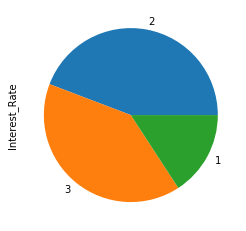

In [17]:
rent_debt_consolidation['Interest_Rate'].value_counts().plot(kind='pie')

Text(0.5, 1.0, "Loan amount requested for 'debt_consolidation' for 'renting' people")

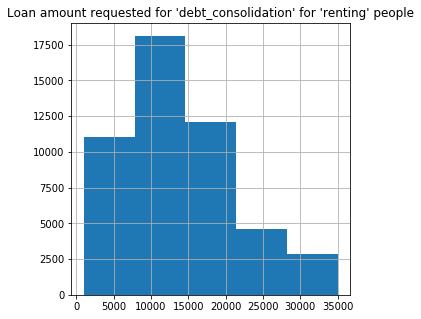

In [18]:
rent_debt_consolidation['Loan_Amount_Requested'].hist(bins=5, figsize=(5,5));
plt.title("Loan amount requested for 'debt_consolidation' for 'renting' people")

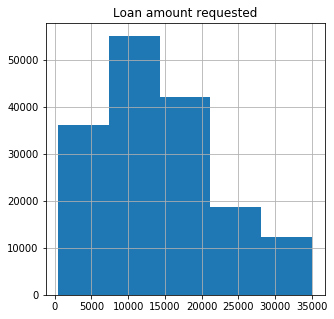

In [19]:
train_data['Loan_Amount_Requested'].hist(bins=5, figsize=(5,5));
plt.title("Loan amount requested");

Data is skewed around 5k-20k

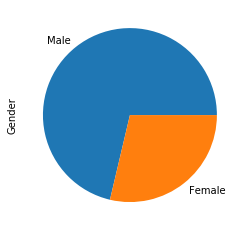

In [20]:
train_data['Gender'].value_counts().plot(kind='pie')

In [21]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,< 1 year,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1
